In [3]:
import h5py
import pandas as pd


In [4]:
resfile = 'results_f2024-05-20.h5'
store = pd.HDFStore(resfile)
keysplit = []
for k in store.keys():
    keysplit.append(k.split('/'))
store.close()
print(keysplit)
dataset_types = ['sim', 'summary', 'tasks']
simulations = { f"{e[1]}/{e[2]}":{d:None for d in dataset_types} for e in keysplit  }
for simulation, dtype in simulations.items():
     for dst in dataset_types:
         simulations[simulation][dst] = pd.read_hdf(resfile,key=f"{simulation}/{dst}")
# for simulation, dtype in simulations.items():
#     print(simulations[simulation]['summary'])


[['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-56', 'sim'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-56', 'summary'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-56', 'tasks'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-47', 'sim'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-47', 'summary'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-47', 'tasks'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-28', 'sim'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-28', 'summary'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-28', 'tasks'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-19', 'sim'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-19', 'summary'], ['', 'Mon240520100342', 'skaworkflows_2024-m-19_15-55-19', 'tasks'], ['', 'Mon240520100342', 'skaworkflows_2024-05-19_20-56-10', 'sim'], ['', 'Mon240520100342', 'skaworkflows_2024-05-19_20-56-10', 'summary'], ['', 'Mon240520100342', 'skawor

<Axes: xlabel='coarse_channels', ylabel='demand'>

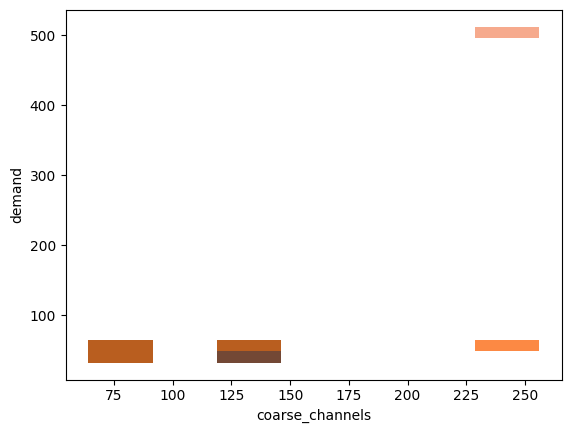

In [9]:
import matplotlib.pyplot as plt 
import json 
df = None

df_total = pd.DataFrame()

for simulation, dtype in simulations.items():
    df = simulations[simulation]['summary']
    
    # print(df[(df['event']=='finished') | (df['event']=='started')]) # & df['actor']=='telescope'])
    # print(df[(df['event']=='stopped') & (df['actor']=='scheduler')]) # & df['actor']=='telescope']

    df_tel = (df[(df['actor']=='instrument')])
    
    obs_durations = []
    for obs in set(df_tel['observation']):
        df_obs = df_tel[df_tel['observation'] == obs]
        obs_durations.append(df_obs[df_obs['event']=='finished']['time'].iloc[0] 
            - df_obs[df_obs['event'] =='started']['time'].iloc[0])

    df_sim = simulations[simulation]['sim']
    # print(df_sim['available_resources'].iloc[0])
    cfg_path = df_sim['config'].iloc[0]
    # BASE_DIR = Path("examples/playground/config")
    # for cfg_path in os.listdir(BASE_DIR):
    #     if (BASE_DIR / cfg_path).is_dir():
    #         continue
    with open( cfg_path) as fp:
        cfg = json.load(fp)
    pipelines = cfg["instrument"]["telescope"]["pipelines"]
    nodes = len(cfg["cluster"]["system"]["resources"])
    observations = pipelines.keys()
    parameters = (
        pd.DataFrame.from_dict(pipelines, orient="index")
        .reset_index()
        .rename(columns={"index": "observation"})
    )
    parameters["nodes"] = nodes
    # parameters["dir"] = BASE_DIR
    
    # So long as the second last workflow is put on the scheduler 
    # before the sum of the total observations is complete, we should be fine. 
    # This means that the only thing that needs computing after the final observation
    # is the workflow associated with that observation, which means we aren't 
    # 'in the red' as far as the shedule is concerned. 
    
    # print(sum(obs_durations))
    print
    
    df_sched=df[(df['actor']=='scheduler')] # get the last "started" time of a workflow on the scheduler
    # print((sum(obs_durations) - sorted(df_sched[df_sched['event']=='stopped']['time'])[-2]) / (sum(obs_durations)))
    # print(sorted(df_tel['time'])[-1])
    # print
    success=True
    if (sum(obs_durations) - sorted(df_sched[df_sched['event']=='stopped']['time'])[-2]) < 0:
        success = False
        # print("Failed")
    # else:
    #     print("Success")

    parameters['success'] = success
    parameters['success_ratio'] = (sum(obs_durations) - sorted(df_sched[df_sched['event']=='stopped']['time'])[-2])/sum(obs_durations)

    # print(parameters[['channels', 'coarse_channels', 'demand', 'success_ratio']])

    df_total=pd.concat([df_total, parameters],ignore_index=True)

# df, sum(obs_durations), sorted(df_sched[df_sched['event']=='stopped']['time'])[-2]

import seaborn as sns

f, ax = plt.subplots()
# dataset = df_total.pivot(index='demand', columns='channels', values='success_ratio')
# sns.catplot(x='demand', y='coarse_channels', hue='success', data=df_total, col='nodes') # ,ax=ax)
# g = sns.stripplot(data=df_total, x='coarse_channels', y='demand', hue='success', ax=ax, dodge=True)
sns.histplot(df_total, x='coarse_channels', y='demand', hue='success', legend=False)

# print(df_total[['channels', 'coarse_channels', 'demand', 'success_ratio']])
# sns.

# df_total

In [ ]:
def get_observation_duration(df):
    df_tel = (df[(df['actor']=='instrument')])

    for obs in set(df_tel['observation']):
        df_obs = df_tel[df_tel['observation'] == obs]
        print(df_obs[df_obs['event']=='finished']['time'].iloc[0] 
            - df_obs[df_obs['event'] =='started']['time'].iloc[0])


In [9]:
def get_config_parameters(config):
    pass

In [ ]:
def get_dataset_types(dataset_type):
    ds = {}
    In [47]: for simulation, dtype in simulations.items():
        ds[simulation] = simulations[simulation][dataset_type]

In [156]:
for simulation, dtype in simulations.items():
    df_sim = simulations[simulation]['sim']
    print(df_sim['available_resources'].iloc[0])
    df_tasks = simulations[simulation]['tasks']
    df_sim['config'].iloc[0]

256
/home/rwb/Dropbox/University/PhD/experiment_data/chapter4/playground/low/prototype/skaworkflows_2024-m-19_15-55-47.json
256
/home/rwb/Dropbox/University/PhD/experiment_data/chapter4/playground/low/prototype/skaworkflows_2024-m-19_15-55-28.json
256
/home/rwb/Dropbox/University/PhD/experiment_data/chapter4/playground/low/prototype/skaworkflows_2024-m-19_15-55-19.json
512
/home/rwb/Dropbox/University/PhD/experiment_data/chapter4/playground/low/prototype/skaworkflows_2024-05-19_20-56-10.json
512
/home/rwb/Dropbox/University/PhD/experiment_data/chapter4/playground/low/prototype/skaworkflows_2024-05-19_20-54-42.json
512
/home/rwb/Dropbox/University/PhD/experiment_data/chapter4/playground/low/prototype/skaworkflows_2024-05-19_20-54-32.json
512
/home/rwb/Dropbox/University/PhD/experiment_data/chapter4/playground/low/prototype/skaworkflows_2024-05-19_20-54-10.json
512
/home/rwb/Dropbox/University/PhD/experiment_data/chapter4/playground/low/prototype/skaworkflows_2024-05-19_20-54-01.json
128